#### Author: Yash Shinge - IPNNL
#### Program assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 6,6
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 13.0

In [2]:
def AMP(Nm, x, Nx):
    
    Am = np.zeros((Nm,), float)
    w = np.zeros((Nm,), float)
    pi = np.pi

    for k in range(1, Nm+1):
        w[k-1] = (pi * (k-1))/(Nm-1)

        Z = np.exp(1j * w[k-1])

        amplitude = 0

        for m in range(1, Nx+1):
            amplitude += x[m-1] * (Z ** (m-1))

        Am[k-1] = abs(amplitude)
    return Am, w



def standard_conv(x, h):
    
    Nx = len(x)
    Nh = len(h)
    X = np.hstack((x, np.zeros((Nx,), float)))
    H = np.hstack((h, np.zeros((Nh,), float)))
    
    
    Ny = Nx + Nh - 1
    y = np.zeros((Ny,), float)

    for p in range(Ny):
        for q in range(Nh):
            if (p - q + 1 > 0):
                y[p] += H[q] * X[ p - q]
                
    return y



def RECON(x, N1, N2):
    
    Nx = len(x)
    xx = np.zeros( (N1 * Nx - 3, ), float)
    Nxx = len(xx)

    j = 0
    for i in range(1, Nxx + 1, N1):
        xx[i - 1] = x[j]
        j += 1

    #     Generate h(n)
    Nh  = 1  + 2 * N1 * N2
    h = np.zeros((Nh, ), float)
    nd = (1 + Nh)//2

    for n in range(1, Nh + 1):
        h[n - 1] = np.sinc( (n - nd) / N1 )

    #     Generate y(n)
    y = standard_conv(xx, h)
    
    for n in range(1, Nxx + 1 ):
        y[n-1] = y[n - 1 + nd]
        
    return y, len(y)

----
### Bandlimited signal

In [3]:
Nz = 256
z = np.zeros((Nz, ), float)

for n in range(1, Nz + 1):
    z[n - 1] = np.cos( ( n * 0.2 / Nz ) * n )

In [4]:
amp, w = AMP(64, z, Nz)

----
### Sampling

In [5]:
N1 = 4
Nx = Nz // N1

In [6]:
x = np.zeros((Nx,), float)
for n in range(1, Nx + 1):
    x[n - 1] = z[(n - 1) * N1]

----
### Recon

In [7]:
N2 = 3
y, Ny = RECON(x, N1, N2)

----
### Plotting

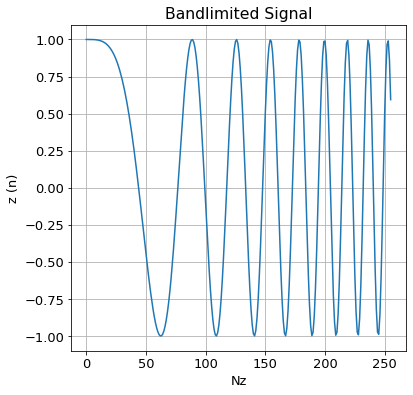

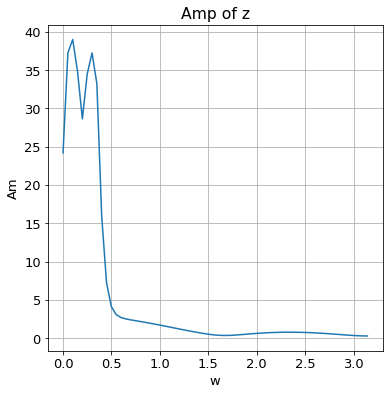

In [8]:
plt.plot(z)
plt.title('Bandlimited Signal')
plt.xlabel('Nz')
plt.ylabel('z (n)')
plt.show()

plt.plot(w, amp)
plt.title('Amp of z')
plt.xlabel('w')
plt.ylabel('Am')
plt.show()

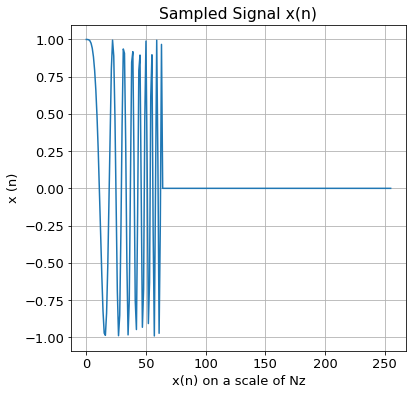

In [9]:
x_ = np.hstack((x, np.zeros((Nz - Nx, ), float)))
plt.title('Sampled Signal x(n)')
plt.xlabel('x(n) on a scale of Nz') #scale of Nz to compare with z(n) i.e to show compression.
plt.ylabel('x (n)')
plt.plot(x_)
plt.show()

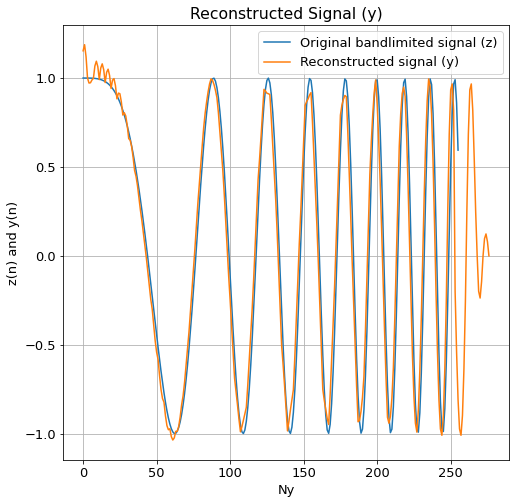

In [10]:
plt.figure(figsize=(8,8))
plt.plot(z)
plt.plot(y)
plt.grid('on')
plt.title('Reconstructed Signal (y)')
plt.xlabel('Ny')
plt.ylabel('z(n) and y(n)')
plt.legend(loc='upper right', labels=['Original bandlimited signal (z)', 'Reconstructed signal (y)'])
plt.show()